DATA CLEANING

In [2]:
import pandas as pd
import numpy as np

url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv'

df = pd.read_csv(url, header=None)
df.head()

headers = ["symboling","normalized-losses",'make','fuel-type','aspiration','num-of-doors',
           'body-style','drive-wheels','engine-location','wheel-base','length','width','height',
           'curb-weight','enfine-type','num-of-cylinders','engine-size','fuel-system','bore',
           'stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highwawy-mpg','price']
df.columns = headers
df = df.replace('?',np.NaN,)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highwawy-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
# Conocer que valores faltantes se tienen por columnas (Valores True)

missing_data = df.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

enfine-type
False    205
Name: enfine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

In [4]:
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
df["normalized-losses"].replace(np.NaN, avg_norm_loss, inplace=True)

avg_bore = df['bore'].astype('float').mean(axis=0)
df['bore'].replace(np.NaN,avg_bore,inplace=True)

avg_price = df['price'].astype('float').mean(axis=0)
df['price'].replace(np.NaN,avg_price,inplace=True)


In [5]:
avg_stroke = df['stroke'].astype('float').mean(axis=0)
df['stroke'].replace(np.NaN,avg_stroke,inplace=True)

avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
df['horsepower'].replace(np.NaN,avg_horsepower,inplace=True)

avg_peak_rpm = df['peak-rpm'].astype('float').mean(axis=0)
df['peak-rpm'].replace(np.NaN,avg_peak_rpm,inplace=True)

#Renombrar una columna
df.rename(columns={'city-mpg': 'city-L/100km'}, inplace=True)


In [6]:
# Obtener que valores estan presentes en una columna
df['num-of-doors'].value_counts()

# Obtener el tipo de un valor que mas se repite
df['num-of-doors'].value_counts().idxmax()
df['num-of-doors'].replace(np.NaN,"four",inplace=True)

#Eliminar las filas que no tienen datos segun un campo dado 
df.dropna(subset=['price'],axis=0,inplace=True)

#Resetear los indices debido a las columnas eliminadas
df.reset_index(drop=True,inplace=True)
#df.head()

In [7]:
# Revisar el tipo de dato que se tiene
df.dtypes

#Cambiar el tipo de dato que se tiene en un campo
df[['bore','stroke']] = df[['bore','stroke']].astype('float')
df[['normalized-losses']] = df[['normalized-losses']].astype('float')
df[['price']] = df[['price']].astype('float')
df[['peak-rpm']] = df[['peak-rpm']].astype('float')

df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
enfine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-L/100km           int64
highwawy-mpg           int64
price                float64
dtype: object

Standardization

In [8]:
#df['city-mpg'] = 235/df['city-mpg']

df['highwawy-mpg'] = 235/df['highwawy-mpg']
df.rename(columns={'highwawy-mpg':"higway-L/100km"}, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,higway-L/100km,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0


Normalization

In [9]:
#Metodo Escalado Simple
df['length'] = df['length']/df['length'].max()

#Metodo Min-Max
df['length'] = (df['length'] - df['length'].min()) / (df['length'].max() - df['length'].min())

#Metodo puntaje Z
df['length'] = (df['length'] - df['length'].mean()) / df['length'].std()

#Normalizacion de 'width' y 'height'
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max()

# Imprimir columnas especificas de un dataframe
df[['length','width','height']].head()

,length,width,height
0,-0.425480,0.886584,0.816054
1,-0.425480,0.886584,0.816054
2,-0.230948,0.905947,0.876254
3,0.206750,0.915629,0.908027
4,0.206750,0.918396,0.908027


BINNIG (Dividir en rangos)

In [10]:
df['horsepower'] = df['horsepower'].astype(int,copy=True)

# Agrupar en rangos iguales por categoria genereda
bins = np.linspace(min(df['price']),max(df['price']),4) # Dividir los datos en el numero de intervalos dados
group_names = ['Low','Medium','High']
df['price-binned'] = pd.cut(df['price'], bins,labels=group_names,include_lowest=True) # Organiza los datos en los rangos establecidos 

Text(0.5, 1.0, 'horsepower bins')

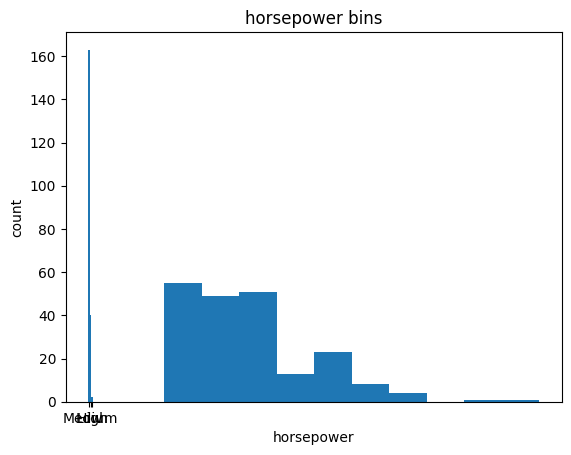

In [11]:
#Agrupar por valores numericos

import matplotlib as plt
from matplotlib import pyplot

# Graficar un histograma de la columna especificada
plt.pyplot.hist(df['horsepower'])
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

# Generar los grupos
start_value = min(df['horsepower'])
end_value = max(df['horsepower'])
numbers_generated = 4

# Construcción de los grupos (bins)
bins = np.linspace(start_value,end_value,numbers_generated)
bins

# Configurar los nombres de los grupos
group_names = ['Low','Medium','High']

# Funcion 'cut' para hacer la asignacion de grupos
df['horsepower-binned'] = pd.cut(df['horsepower'],bins,labels=group_names,include_lowest=True)
df[['horsepower','horsepower-binned']].head(20)

# Ver la cantidad en cada uno de los grupos
df['horsepower-binned'].value_counts()

#Graficar por barras
pyplot.bar(group_names,df['horsepower-binned'].value_counts())
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")


Visualization

Text(0.5, 1.0, 'horsepower bins')

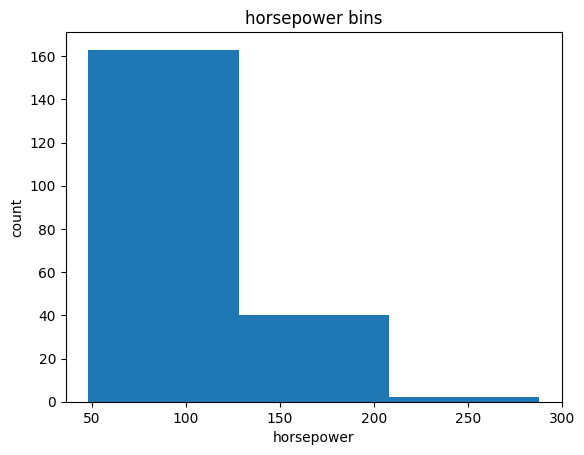

In [12]:
plt.pyplot.hist(df['horsepower'], bins=3)
plt.pyplot.xlabel('horsepower')
plt.pyplot.ylabel('count')
plt.pyplot.title('horsepower bins')

In [13]:
lista = ([0,10,2,5,3,6,8,5,3,2,35,3,1,3,5,3,1,2,4,5,7,8,5,4,44])
bins = np.linspace(min(lista), max(lista), num=4)
group_names = ['Low','Medium','High']
x = pd.cut(lista, bins,labels=group_names,include_lowest=True)
x

['Low', 'Low', 'Low', 'Low', 'Low', ..., 'Low', 'Low', 'Low', 'Low', 'High']
Length: 25
Categories (3, object): ['Low' < 'Medium' < 'High']

CATEGORICAL INTO QUANTITATIVE VARIABLES (Vectores one-hot)

In [14]:
#Obtener los nombres de las columnas
df.columns

#Obtener los indicadores de variable
dummy_variable_1 = pd.get_dummies(df['fuel-type'])
dummy_variable_1.head(20)

#Cambiar los nombres de los indicadores de variable generadas
dummy_variable_1.rename(columns={'gas':'fuel-type-gas','diesel':'fuel-type-diesel'},inplace=True)
dummy_variable_1.head()

#Unir los nuevos valores obtenidos
df = pd.concat([df,dummy_variable_1],axis=1)

#Eliminar la columna original del dataframe

df.drop('fuel-type',axis=1,inplace=True)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-L/100km,higway-L/100km,price,price-binned,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122.0,alfa-romero,std,two,convertible,rwd,front,88.6,-0.425480,...,9.0,111,5000.0,21,8.703704,13495.0,Low,Low,0,1
1,3,122.0,alfa-romero,std,two,convertible,rwd,front,88.6,-0.425480,...,9.0,111,5000.0,21,8.703704,16500.0,Low,Low,0,1
2,1,122.0,alfa-romero,std,two,hatchback,rwd,front,94.5,-0.230948,...,9.0,154,5000.0,19,9.038462,16500.0,Low,Medium,0,1
3,2,164.0,audi,std,four,sedan,fwd,front,99.8,0.206750,...,10.0,102,5500.0,24,7.833333,13950.0,Low,Low,0,1
4,2,164.0,audi,std,four,sedan,4wd,front,99.4,0.206750,...,8.0,115,5500.0,18,10.681818,17450.0,Low,Low,0,1


In [15]:
dummy_variables_2 = pd.get_dummies(df['aspiration'])
dummy_variables_2.rename(columns={'std':'aspiration-std','turbo':'aspiration-turbo'},inplace=True)
df = pd.concat([df,dummy_variables_2],axis=1)
df.drop('aspiration',axis=1,inplace=True)
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,peak-rpm,city-L/100km,higway-L/100km,price,price-binned,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,-0.425480,0.886584,...,5000.0,21,8.703704,13495.0,Low,Low,0,1,1,0
1,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,-0.425480,0.886584,...,5000.0,21,8.703704,16500.0,Low,Low,0,1,1,0
2,1,122.0,alfa-romero,two,hatchback,rwd,front,94.5,-0.230948,0.905947,...,5000.0,19,9.038462,16500.0,Low,Medium,0,1,1,0
3,2,164.0,audi,four,sedan,fwd,front,99.8,0.206750,0.915629,...,5500.0,24,7.833333,13950.0,Low,Low,0,1,1,0
4,2,164.0,audi,four,sedan,4wd,front,99.4,0.206750,0.918396,...,5500.0,18,10.681818,17450.0,Low,Low,0,1,1,0


In [16]:
df = df.loc[:,~df.columns.duplicated()]
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,peak-rpm,city-L/100km,higway-L/100km,price,price-binned,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,-0.425480,0.886584,...,5000.0,21,8.703704,13495.0,Low,Low,0,1,1,0
1,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,-0.425480,0.886584,...,5000.0,21,8.703704,16500.0,Low,Low,0,1,1,0
2,1,122.0,alfa-romero,two,hatchback,rwd,front,94.5,-0.230948,0.905947,...,5000.0,19,9.038462,16500.0,Low,Medium,0,1,1,0
3,2,164.0,audi,four,sedan,fwd,front,99.8,0.206750,0.915629,...,5500.0,24,7.833333,13950.0,Low,Low,0,1,1,0
4,2,164.0,audi,four,sedan,4wd,front,99.4,0.206750,0.918396,...,5500.0,18,10.681818,17450.0,Low,Low,0,1,1,0


Guardar como CSV

In [17]:
df.to_csv('clean_df.csv')